<a href="https://colab.research.google.com/github/Ranga12891/Classification-of-Glass-Type/blob/main/Classification_of_Glass_Types_on_USA_Forensic_Science_Service_Data_Set_using_KNN_Alg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imorting Necessary package**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy.stats import norm
import statistics

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
!pip install mlxtrend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement mlxtrend (from versions: none)
ERROR: No matching distribution found for mlxtrend


In [5]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn import datasets, neighbors
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions # used to plot the decision boundary of ml algorithms
from sklearn.model_selection import cross_val_score # import all the functions reqd for cross validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,plot_roc_curve


**Attributes of Information:**


   1. Id number: 1 to 214
   2. RI: refractive index
   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
   4. Mg: Magnesium
   5. Al: Aluminum
   6. Si: Silicon
   7. K: Potassium
   8. Ca: Calcium
   9. Ba: Barium
   10. Fe: Iron
   11. Type of glass: (class attribute)
      -- 1 building_windows_float_processed
      -- 2 building_windows_non_float_processed
      -- 3 vehicle_windows_float_processed
      -- 4 vehicle_windows_non_float_processed (none in this database)
      -- 5 containers
      -- 6 tableware
      -- 7 headlamps




**Importing data set (.txt file) as Data Frame**

Since the data set does not have column names, we need to feed the column names


In [6]:
Attributes =  ["Idnumber","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","GlassType"]  # Column Names
Glass_Type = ["Building_Windows_Float_Processed","Building_Windows_Non_Float_Processed",
              "Vehicle_Windows_Float_Processed","Vehicle_Windows_Non_Float_Processed(Noneinthisdatabase)",
              "Containers","Tableware","Headlamps"]   # Glass Type Description

In [7]:
# Feature Col & Description
Ftr_desc = ["Refractive Index","Sodium","Magnesium","Aluminum","Silicon","Potassium","Calcium","Barium","Iron"]
Ftr = Attributes[1:len(Attributes)-1]
Ftr

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

In [8]:
df = pd.read_csv("/content/drive/MyDrive/Data_Science/Assignment_10/glass.data",sep =",",header = None,names = Attributes)
df_Test = pd.read_csv("/content/drive/MyDrive/Data_Science/Assignment_10/testKNN.txt",sep =",",header = None,names = Attributes)


In [9]:
df.head(5)

,Idnumber,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,GlassType
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [10]:
df_Test.head(5)

,Idnumber,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,GlassType
0,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
1,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
2,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
3,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
4,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2


**Data Cleaning**

In [11]:
# Removing IDnumber Column
df.drop('Idnumber', axis = 1, inplace = True)
# Decribe to get intution of the data
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,GlassType
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


**EDA**

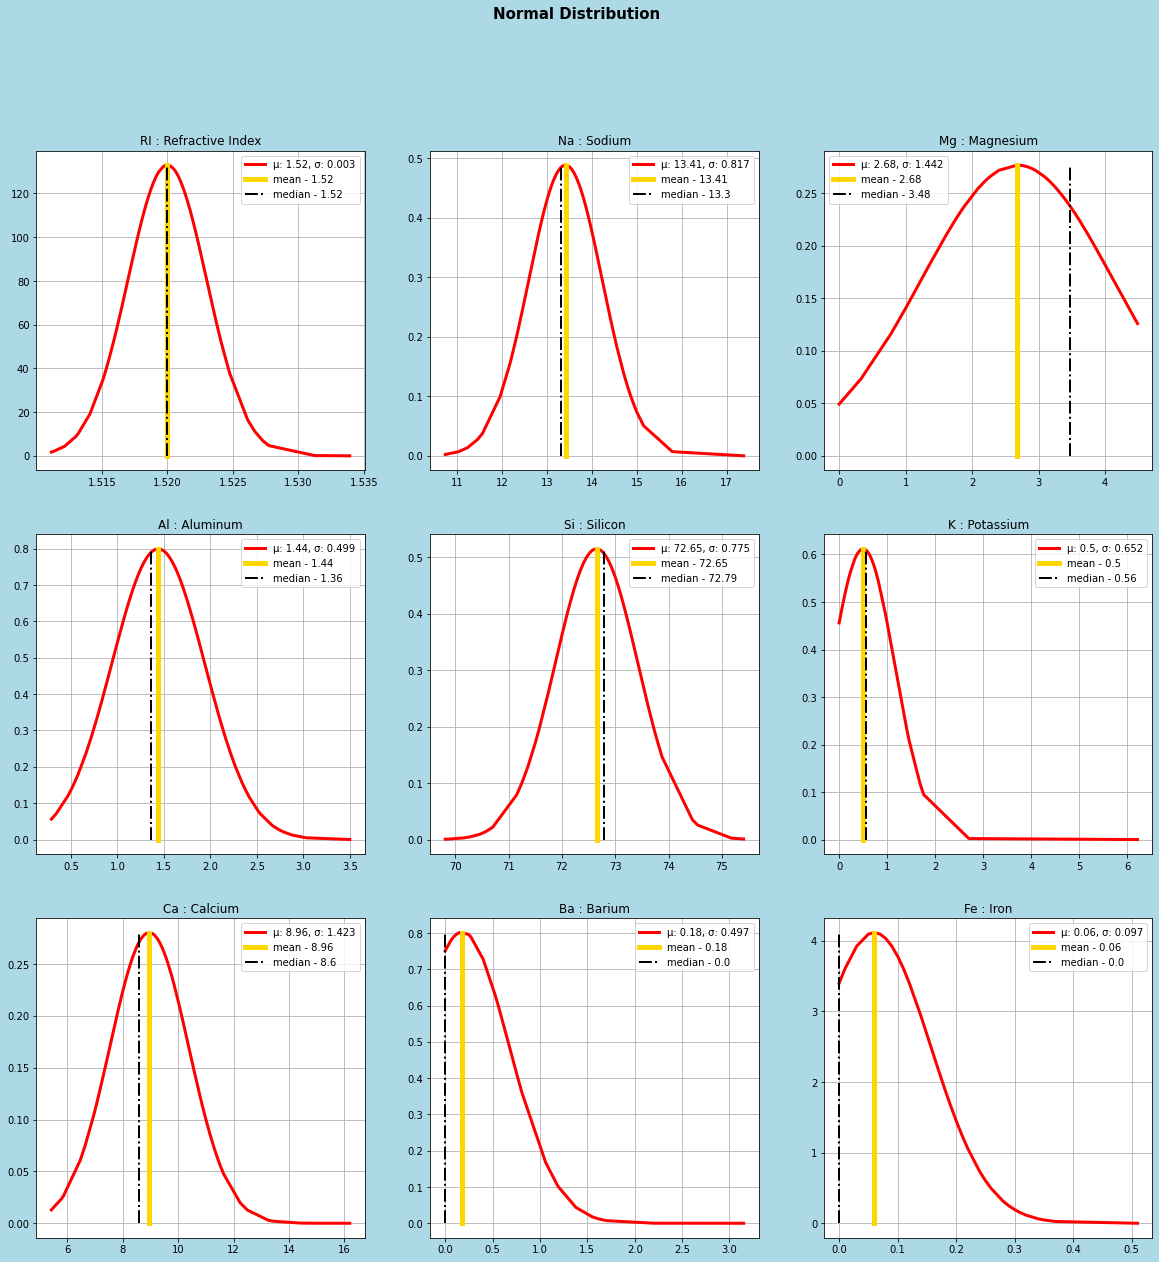

In [12]:
# Normal Distribution plot
m,n,k = 0,0,0
fig,ax = plt.subplots(3,3,figsize=(20, 20), facecolor='lightblue',frameon=True)
fig.suptitle('Normal Distribution',fontsize = 15,fontweight ='bold')
for i, j in zip(Ftr,Ftr_desc):
  mean = round(df[i].mean(),2)
  sd = round(df[i].std(),3)
  median = round(df[i].median(),2)
  Norm_dist = norm.pdf(df[i].sort_values(), mean, sd)
  #print(list(ax))
  #print(mean,sd,median)

  ax[m,n].plot(df[i].sort_values(),Norm_dist , label='μ: ' + str(mean) + ', σ: ' + str(sd), color='red',linewidth = 3)
  ax[m,n].plot([mean,mean], [0,max(Norm_dist)], label='mean - ' + str(mean), color='gold',linewidth = 5)
  ax[m,n].plot([median,median], [0,max(Norm_dist)], label='median - ' + str(median), color='black',linewidth = 2,linestyle = '-.')
  ax[m,n].grid()
  ax[m,n].legend()
  ax[m,n].set_title(i + " : " + j)
  k = k + 1
  m = m + 1 if k % 3 == 0 else m 
  n = 0 if k % 3 == 0 else n + 1
  #print(m,n) 
#plt.showall()

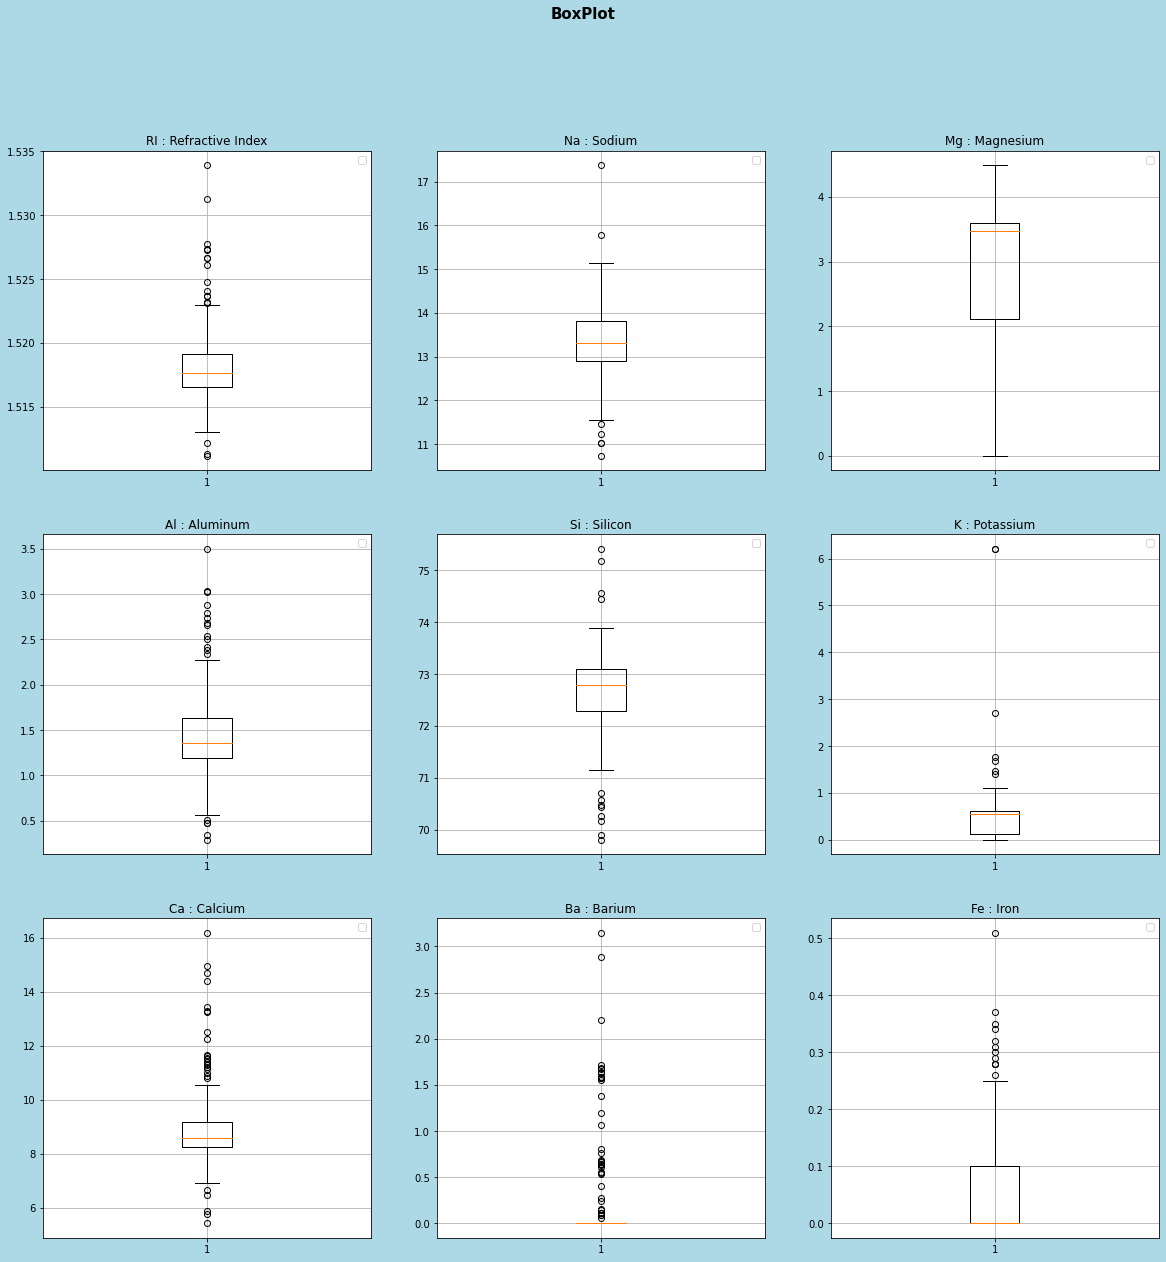

In [13]:
# Box Plot to see Outliers
m,n,k = 0,0,0
fig,ax = plt.subplots(3,3,figsize=(20, 20), facecolor='lightblue',frameon=True)
fig.suptitle('BoxPlot',fontsize = 15,fontweight ='bold')
for i, j in zip(Ftr,Ftr_desc):
  mean = round(df[i].mean(),2)
  sd = round(df[i].std(),3)
  median = round(df[i].median(),2)
  Norm_dist = norm.pdf(df[i].sort_values(), mean, sd)
  #print(list(ax))
  #print(mean,sd,median)

  ax[m,n].boxplot(df[i])
  # ax[m,n].boxplot([mean,mean], [0,max(Norm_dist)], label='mean - ' + str(mean), color='gold',linewidth = 5)
  # ax[m,n].plot([median,median], [0,max(Norm_dist)], label='median - ' + str(median), color='black',linewidth = 2,linestyle = '-.')
  ax[m,n].grid()
  ax[m,n].legend()
  ax[m,n].set_title(i + " : " + j)
  k = k + 1
  m = m + 1 if k % 3 == 0 else m 
  n = 0 if k % 3 == 0 else n + 1


In [ ]:
m,n,k = 0,0,0
fig,axes = plt.subplots(18,4,figsize=(20, 50), facecolor='lightblue',frameon=True)
fig.suptitle('Scatter Plot',fontsize = 15,fontweight ='bold')
for i in Ftr:
  for j in Ftr:
  #mean = round(df[i].mean(),2)
  #sd = round(df[i].std(),3)
  #median = round(df[i].median(),2)
  #Norm_dist = norm.pdf(df[i].sort_values(), mean, sd)
  #print(list(ax))
  #print(mean,sd,median)
    if i != j :
      #axes[m,n].plot(df[i],df[j], marker='o', linestyle='', ms=5, label=df.GlassType)
      sns.scatterplot(ax = axes[m,n],x=df[i], y=df[j], data=df, hue=df.GlassType)
      # ax[m,n].boxplot([mean,mean], [0,max(Norm_dist)], label='mean - ' + str(mean), color='gold',linewidth = 5)
      # ax[m,n].plot([median,median], [0,max(Norm_dist)], label='median - ' + str(median), color='black',linewidth = 2,linestyle = '-.')
      axes[m,n].grid()
      #ax[m,n].legend()
      axes[m,n].set_title(i + " : " + j)
      k = k + 1
      m = m + 1 if k % 4 == 0 else m 
      n = 0 if k % 4 == 0 else n + 1


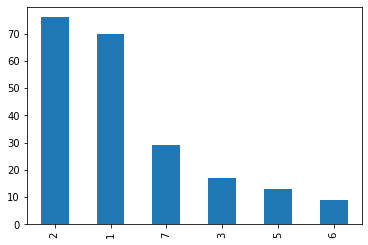

In [15]:
df['GlassType'].value_counts().plot.bar()

It is Clear from the above chart that the data set is unbalanced data set.

We need to Convert this dataset to balanced dataset

Now, we will do a combination of over-sampling and under-sampling, using the SMOTE and Tomek links techniques:

In [16]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import imblearn

In [18]:
X = df.drop('GlassType', axis = 1).values
Y = df.GlassType.values


In [19]:
X.shape

(214, 9)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)


In [21]:
y_train

array([1, 7, 1, 5, 1, 2, 1, 7, 5, 2, 2, 1, 6, 2, 2, 2, 2, 6, 1, 2, 2, 1,
       2, 3, 6, 6, 1, 1, 3, 7, 1, 7, 2, 2, 3, 2, 6, 2, 7, 1, 1, 7, 3, 3,
       2, 2, 2, 5, 1, 2, 3, 2, 2, 2, 6, 2, 7, 3, 2, 2, 1, 2, 2, 7, 5, 5,
       7, 2, 1, 2, 7, 3, 1, 1, 1, 2, 5, 2, 7, 2, 1, 2, 5, 7, 7, 3, 1, 1,
       7, 3, 2, 1, 1, 5, 3, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1,
       2, 2, 7, 1, 1, 7, 2, 2, 2, 2, 2, 2, 3, 2, 5, 7, 2, 1, 1, 7, 2, 1,
       1, 2, 7, 2, 7, 1, 2, 1, 1, 7, 1, 1, 1, 2, 1, 2, 5, 1, 2, 5, 1, 2,
       2, 3, 1, 1, 1, 7, 2, 6, 3, 1, 2, 2, 1, 1, 2, 1, 5])

Balancing The Traing data

In [22]:
x_train.shape,y_train.shape
s = y_train.tolist()
s = set(s)
s

{1, 2, 3, 5, 6, 7}

In [25]:
from imblearn.combine import SMOTEENN

#plot_2d_space(X, Y, 'Original Data')

smt = SMOTEENN(sampling_strategy='all')
#smt = SMOTEENN()

X_smt, Y_smt = smt.fit_resample(x_train, y_train)

#plot_2d_space(X_smt, y_smt, 'SMOTE + ENN links')
X.shape,Y.shape,X_smt.shape,Y_smt.shape


((214, 9), (214,), (290, 9), (290,))

In [ ]:
#from imblearn.combine import SMOTE

#plot_2d_space(X, Y, 'Original Data')

#smt = SMOTEENN(sampling_strategy='minority')
#X_smt, Y_smt = smt.fit_resample(x_train, y_train)

#plot_2d_space(X_smt, y_smt, 'SMOTE + ENN links')
#X_smt.shape,Y_smt.shape
#X.shape,Y.shape

Applying the ML MODEL - KNN Algorithm

In [26]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_smt = scaler.fit_transform(X_smt)
x_test = scaler.transform(x_test)
CV_Scores = []
# Hyperparameter Tuning
for i in range(2,10):
  knn = KNeighborsClassifier(n_neighbors=i) #it will initialise the model with @neighbours as k 
  knn.fit(X_smt, Y_smt) # train the model
  #print("Train Accuracy : ", knn.score(x_train,y_train)) # test the model and it computes the accuracy (train data accuracy)
  #print("Val Accuracy : ", np.mean(cross_val_score(knn, x_train, y_train, cv=10)))
  CV_Scores.append(round(np.mean(cross_val_score(knn, x_train, y_train, cv=10)),3))
print("Optimal K Value : ",CV_Scores.index(max(CV_Scores))+ 2,"with CV Score - ",max(CV_Scores))
print(CV_Scores)
knn = KNeighborsClassifier(n_neighbors=2) #it will initialise the model with @neighbours as k 
knn.fit(X_smt, Y_smt)


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklear

Optimal K Value :  2 with CV Score -  0.668
[0.668, 0.667, 0.604, 0.65, 0.626, 0.615, 0.609, 0.598]


KNeighborsClassifier(n_neighbors=2)

In [ ]:
KNN_pred = knn.predict_proba(x_test)
KNN_pred,y_test

In [28]:
knn.score(x_test,y_test)

KNN_Score = roc_auc_score(y_test, KNN_pred,multi_class = 'ovr')
KNN_Score

0.8660803891449053

In [29]:
df_Test.head(5)

,Idnumber,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,GlassType
0,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
1,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
2,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
3,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
4,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2


In [ ]:
df_Test

In [30]:
 Test_Data_X = df_Test.drop(['Idnumber','GlassType'],axis = 1).values
Test_Data_X_Transformed = scaler.transform(Test_Data_X)
Test_Data_Y = df_Test.GlassType.values

In [31]:
Predicted = knn.predict_proba(Test_Data_X_Transformed)
#y_class = np.argmax(y_pred, axis = 0)
knn.score(Test_Data_X_Transformed,Test_Data_Y)

0.9444444444444444

In [32]:
Predicted.shape,Test_Data_Y.shape

((18, 6), (18,))

In [33]:
roc_auc_score(Test_Data_Y, Predicted,multi_class = 'ovr')


1.0

In [35]:
Predicted = knn.predict(Test_Data_X_Transformed)

In [36]:
OutPut_DF = df_Test[['Idnumber','GlassType']]
OutPut_DF['Predicted Glass Type'] = Predicted
OutPut_DF

<ipython-input-36-1fd37588efd6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OutPut_DF['Predicted Glass Type'] = Predicted


,Idnumber,GlassType,Predicted Glass Type
0,68,1,1
1,69,1,1
2,70,1,1
3,144,2,2
4,145,2,1
5,146,2,2
6,161,3,3
7,162,3,3
8,163,3,3
9,174,5,5
